In [68]:
import numpy as np
import cv2 as cv
import matplotlib.pyplot as plt

In [69]:
import glob

import PIL.ExifTags
import PIL.Image

In [70]:
bloques = [f'./imagenes_tp/img_bloques/imgBloque{i}.png' for i in range(1,16)] + [f'./imagenes_tp/img_bloques/imgBloque20.png']

./imagenes_tp/img_bloques/imgBloque1.png
Longitud: 455.77878522872925 - Área: 11132.5
Centro: (351.3536376953125, 128.78176879882812) - Dimension: (75.96466064453125, 150.368408203125) - Rotacion: 48.01278305053711


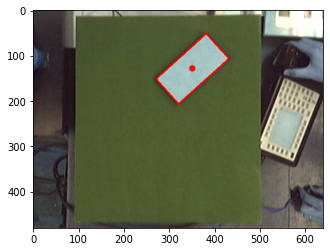

./imagenes_tp/img_bloques/imgBloque2.png
Longitud: 449.8792916536331 - Área: 11008.5
Centro: (298.1031799316406, 156.44198608398438) - Dimension: (149.1449737548828, 75.25286865234375) - Rotacion: 48.12213134765625


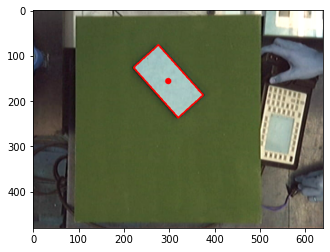

./imagenes_tp/img_bloques/imgBloque3.png
Longitud: 481.457931637764 - Área: 11217.5
Centro: (414.2087707519531, 151.40403747558594) - Dimension: (150.0602264404297, 76.54962158203125) - Rotacion: 65.30844116210938


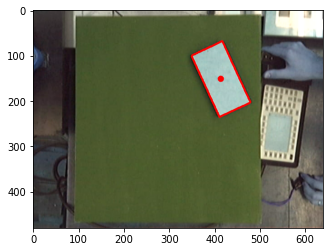

./imagenes_tp/img_bloques/imgBloque4.png
Longitud: 476.6589421033859 - Área: 11384.5
Centro: (178.5289306640625, 361.8793640136719) - Dimension: (150.0324249267578, 78.36514282226562) - Rotacion: 66.61477661132812


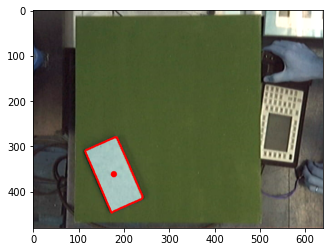

./imagenes_tp/img_bloques/imgBloque5.png
Longitud: 451.77878749370575 - Área: 11130.0
Centro: (299.0718994140625, 355.9086608886719) - Dimension: (75.65641021728516, 150.0962677001953) - Rotacion: 46.332218170166016


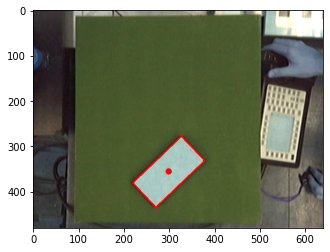

./imagenes_tp/img_bloques/imgBloque6.png
Longitud: 480.61225938796997 - Área: 11307.0
Centro: (408.4663391113281, 358.72796630859375) - Dimension: (152.16903686523438, 76.08451843261719) - Rotacion: 59.74356460571289


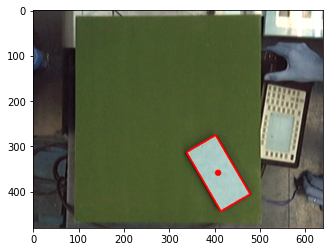

./imagenes_tp/img_bloques/imgBloque7.png
Longitud: 480.34523379802704 - Área: 11133.5
Centro: (392.0344543457031, 271.41375732421875) - Dimension: (75.7636947631836, 150.0418243408203) - Rotacion: 21.801406860351562


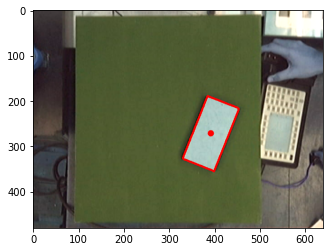

./imagenes_tp/img_bloques/imgBloque8.png
Longitud: 475.20309841632843 - Área: 10996.5
Centro: (279.3534851074219, 266.1330261230469) - Dimension: (149.47378540039062, 75.49943542480469) - Rotacion: 69.56716918945312


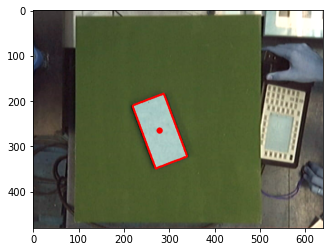

./imagenes_tp/img_bloques/imgBloque9.png
Longitud: 476.4751765727997 - Área: 11248.0
Centro: (150.64501953125, 258.4842529296875) - Dimension: (77.56439971923828, 148.94139099121094) - Rotacion: 19.583993911743164


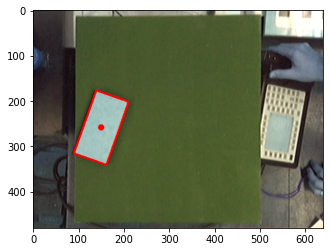

./imagenes_tp/img_bloques/imgBloque10.png
Longitud: 476.80107748508453 - Área: 11166.5
Centro: (170.59930419921875, 144.8184814453125) - Dimension: (150.45875549316406, 76.05697631835938) - Rotacion: 65.55604553222656


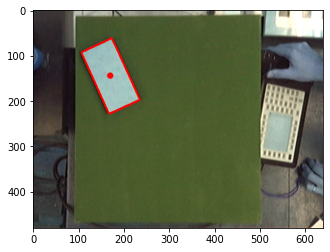

./imagenes_tp/img_bloques/imgBloque11.png
Longitud: 461.5950139760971 - Área: 11280.5
Centro: (225.51092529296875, 129.0948944091797) - Dimension: (77.3231201171875, 149.13473510742188) - Rotacion: 38.41805648803711


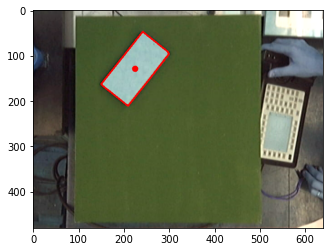

./imagenes_tp/img_bloques/imgBloque12.png
Longitud: 469.0365778207779 - Área: 11024.0
Centro: (269.27764892578125, 129.64132690429688) - Dimension: (150.707763671875, 75.18319702148438) - Rotacion: 78.92979431152344


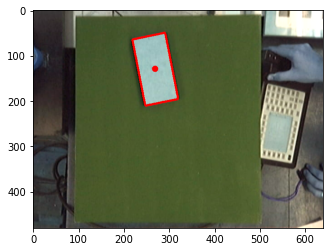

./imagenes_tp/img_bloques/imgBloque13.png
Longitud: 478.0193328857422 - Área: 11195.0
Centro: (365.1622619628906, 125.82916259765625) - Dimension: (75.65897369384766, 151.77186584472656) - Rotacion: 16.966148376464844


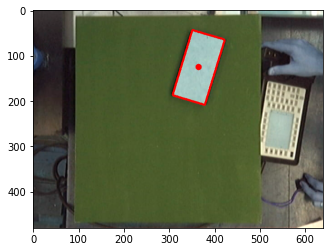

./imagenes_tp/img_bloques/imgBloque14.png
Longitud: 471.511754155159 - Área: 11029.5
Centro: (304.71612548828125, 225.95089721679688) - Dimension: (149.59518432617188, 75.6281509399414) - Rotacion: 32.195735931396484


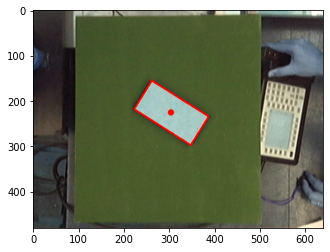

./imagenes_tp/img_bloques/imgBloque15.png
Longitud: 473.5117540359497 - Área: 11208.5
Centro: (374.7359619140625, 319.0224609375) - Dimension: (150.73167419433594, 76.63783264160156) - Rotacion: 32.0053825378418


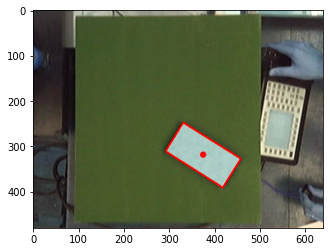

./imagenes_tp/img_bloques/imgBloque20.png
Longitud: 473.5117540359497 - Área: 11186.5
Centro: (374.84832763671875, 318.8427734375) - Dimension: (150.73171997070312, 76.21385192871094) - Rotacion: 32.00538635253906


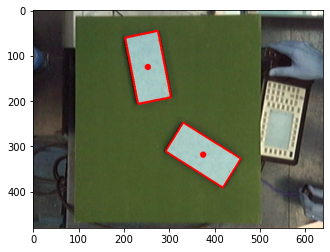

In [71]:
centers = []
vertices = []
dimensions = []
orientation = []
bloques_bin = []
for b in bloques:
    print(b)
    img = cv.imread(b)
    imgray = cv.cvtColor(img, cv.COLOR_BGR2GRAY)

    # Binarizamos con Otzu
    ret, img_bin = cv.threshold(imgray,30,255,cv.THRESH_BINARY+cv.THRESH_OTSU)
    #bloques_bin.append(img_bin)

    img_cut = img_bin[20:500, 0:500]
    contours, hierarchy = cv.findContours(img_cut, cv.RETR_TREE, cv.CHAIN_APPROX_SIMPLE, offset=(0,20))

    img_out = img.copy()
    cv.drawContours(img_out, contours, -1, (0,255,0), 3)
    
    bloque_contours = []
    for c in contours:
        if cv.contourArea(c) < 10000:
            continue
        bloque_contours.append(c)
        
    img_out = img.copy()
    cnt = bloque_contours[0]
    area = cv.contourArea(cnt)
    long = cv.arcLength(cnt, False)
    center, dim, rot = cv.minAreaRect(cnt)
    vert = cv.boxPoints([center, dim, rot])
    print('Longitud: {} - Área: {}'.format(long, area))
    print('Centro: {} - Dimension: {} - Rotacion: {}'.format(center, dim, rot))
    
    centers.append(center)
    vertices.append(vert)
    dimensions.append(dim)
    orientation.append(rot)
    
    for c in bloque_contours:
        # compute the center of the contour
        M = cv.moments(c)
        cX = int(M["m10"] / M["m00"])
        cY = int(M["m01"] / M["m00"])
        cv.drawContours(img_out, bloque_contours, -1, (255,0,0), 3)
        cv.circle(img_out, (cX, cY), 7, (255, 0, 0), -1)
    plt.imshow(img_out)
    plt.show()

image = cv2.imread(args["image"])
gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
blurred = cv2.GaussianBlur(gray, (5, 5), 0)
thresh = cv2.threshold(blurred, 60, 255, cv2.THRESH_BINARY)[1]

In [74]:
import pandas as pd
pd.DataFrame(centers).to_csv("./save_data/centers.csv", index=False)
#pd.DataFrame(vertices).to_csv("./save_data/vertices.csv", index=False)
pd.DataFrame(dimensions).to_csv("./save_data/dimensions.csv", index=False)
pd.DataFrame(orientation).to_csv("./save_data/orientation.csv", index=False)


In [75]:
vs = []
for v in vertices:
    #print(v)
    vs.append(v.tolist())

In [76]:
pd.DataFrame(vs).to_csv("./save_data/vertices.csv", index=False)


# Transformacion de coordenadas a milimetros

## Read Saved data

In [77]:
import pandas as pd

In [78]:
mtx = pd.read_csv("./save_data/camara_matrix.csv")
mtx = mtx.to_numpy()

In [79]:
dist = pd.read_csv("./save_data/dist_coefficients.csv")
dist = dist.to_numpy()
dist

array([[0.02524597, 0.        , 0.        , 0.        , 0.        ]])

In [80]:
rotation = pd.read_csv("./save_data/rotation_df.csv").to_numpy()
rotation

array([[ 0.99922502, -0.00776181,  0.03858902],
       [ 0.00790022,  0.99996289, -0.00343565],
       [-0.03856092,  0.00373785,  0.99924926]])

In [81]:
translation = pd.read_csv("./save_data/translation_df.csv").to_numpy()
translation

array([[-3.9103371],
       [-5.4846594],
       [25.1157339]])

# Convertir a Milimetros

In [82]:
# R^-1
Inv_R = np.linalg.inv(rotation)
#K^-1
Inv_K = np.linalg.inv(mtx)

In [87]:

def px_to_mm(u,v):
    #s * [uv1] = K * [R|t] * XYZ = K* (R*XYZ1 + t)
    # (s * [uv1] * K^-1 - t) * R^-1 = XYZ1
    # s * [uv1] * K^-1 * R^-1 - t * R^-1 = XYZ1
    
    #genero el vector [uv1] y lo traspongo
    uv = np.array([[u,v,1]], dtype=np.float64).T
    
    # t * R^-1
    res_parcial_d = Inv_R.dot(translation)
    
    # [uv1]*K^-1*R^-1
    res_parcial_i = Inv_R.dot(Inv_K.dot(uv))
    
    # Resuelvo s (asumo Z=0). cociente de z
    s = res_parcial_d[2][0]/res_parcial_i[2][0]
    XYZ1 = Inv_R.dot( s * Inv_K.dot(uv) - translation)
    return XYZ1

In [90]:
saved_centers = []
print(f"CENTERS : {centers}")
for center in centers:
    center_mm = px_to_mm(center[0], center[1])[:2]
    saved_centers.append(center_mm)

CENTERS : [(351.3536376953125, 128.78176879882812), (298.1031799316406, 156.44198608398438), (414.2087707519531, 151.40403747558594), (178.5289306640625, 361.8793640136719), (299.0718994140625, 355.9086608886719), (408.4663391113281, 358.72796630859375), (392.0344543457031, 271.41375732421875), (279.3534851074219, 266.1330261230469), (150.64501953125, 258.4842529296875), (170.59930419921875, 144.8184814453125), (225.51092529296875, 129.0948944091797), (269.27764892578125, 129.64132690429688), (365.1622619628906, 125.82916259765625), (304.71612548828125, 225.95089721679688), (374.7359619140625, 319.0224609375), (374.84832763671875, 318.8427734375)]


In [89]:
saved_vertices = []
for v in vertices:
    v_data = []
    for fila in v:
        v_mm = px_to_mm(fila[0], fila[1])[:2]
        v_data.append(v_mm)
    saved_vertices.append(v_data)
print(saved_vertices[0])  

[array([[2.49382916],
       [2.4933251 ]]), array([[ 5.90443752],
       [-0.59686882]]), array([[7.46803651],
       [1.12909945]]), array([[4.07381906],
       [4.22246979]])]


In [93]:
saved_dims = []
for v in saved_vertices:
    w = np.sqrt((v[1][0]-v[0][0])**2+(v[1][1]-v[0][1])**2)
    h = np.sqrt((v[3][0]-v[0][0])**2+(v[3][1]-v[0][1])**2)
    
    if w > h:
        saved_dims.append([w,h])
    else:
        saved_dims.append([h,w])

In [101]:
real_w = 65
real_h = 130

error_x = []
error_y = []

for dim in saved_dims:
    error_x.append((abs(real_h - dim[0]) / dim[0]))
    error_y.append((abs(real_w - dim[1]) / dim[1]))

In [102]:
import matplotlib.pyplot as plt

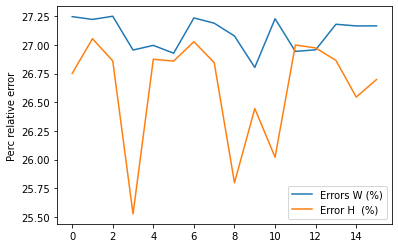

In [104]:
plt.plot(range(len(saved_dims)), error_x, label = 'Errors W (%)')
plt.ylabel('Perc relative error')

plt.plot(range(len(saved_dims)), error_y, label = 'Error H  (%)')
plt.legend()
plt.show()